Betty Liu
Data 201 Project 3

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1. INTRO BELOW**
A dataset from **Kaggle**. Sources
This dataset is derived from several real-world sources that monitor air quality and environmental factors:

World Health Organization (WHO) (https://www.who.int/health-topics/air-pollution)
World Bank Data (https://data.worldbank.org/indicator/EN.POP.DNST). This Dataset contains 5000 observations, and 10 features .

Link: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

Key Features:

* Temperature (°C): Average temperature of the region.
* Humidity (%): Relative humidity recorded in the region.
* PM2.5 Concentration (µg/m³): Fine particulate matter levels.
* PM10 Concentration (µg/m³): Coarse particulate matter levels.
* NO2 Concentration (ppb): Nitrogen dioxide levels.
* SO2 Concentration (ppb): Sulfur dioxide levels.
* CO Concentration (ppm): Carbon monoxide levels.
* Proximity to Industrial Areas (km): Distance to the * nearest industrial zone.
* Population Density (people/km²): Number of people per square kilometer in the region.

Preliminary Questions:
* How do temperature and pollution levels correlate with air quality?
* Can we predict the air quality based on factors like temperature, and Carbon monoxide levels.

In [164]:
#load data
df = pd.read_csv('updated_pollution_dataset.csv')

In [166]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


**Data Wrangling**

In [167]:
# Data wrangling
# Convert categorical to numerical
df['Air Quality'] = df['Air Quality'].map({'Moderate': 0, 'Good': 1 })


print('Missing values in each column:\n', df.isnull().sum())
df.fillna(df.median(), inplace=True)
print('\nData types:\n',df.dtypes)


Missing values in each column:
 Temperature                         0
Humidity                            0
PM2.5                               0
PM10                                0
NO2                                 0
SO2                                 0
CO                                  0
Proximity_to_Industrial_Areas       0
Population_Density                  0
Air Quality                      1500
dtype: int64

Data types:
 Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                      float64
dtype: object


**EDA principles**

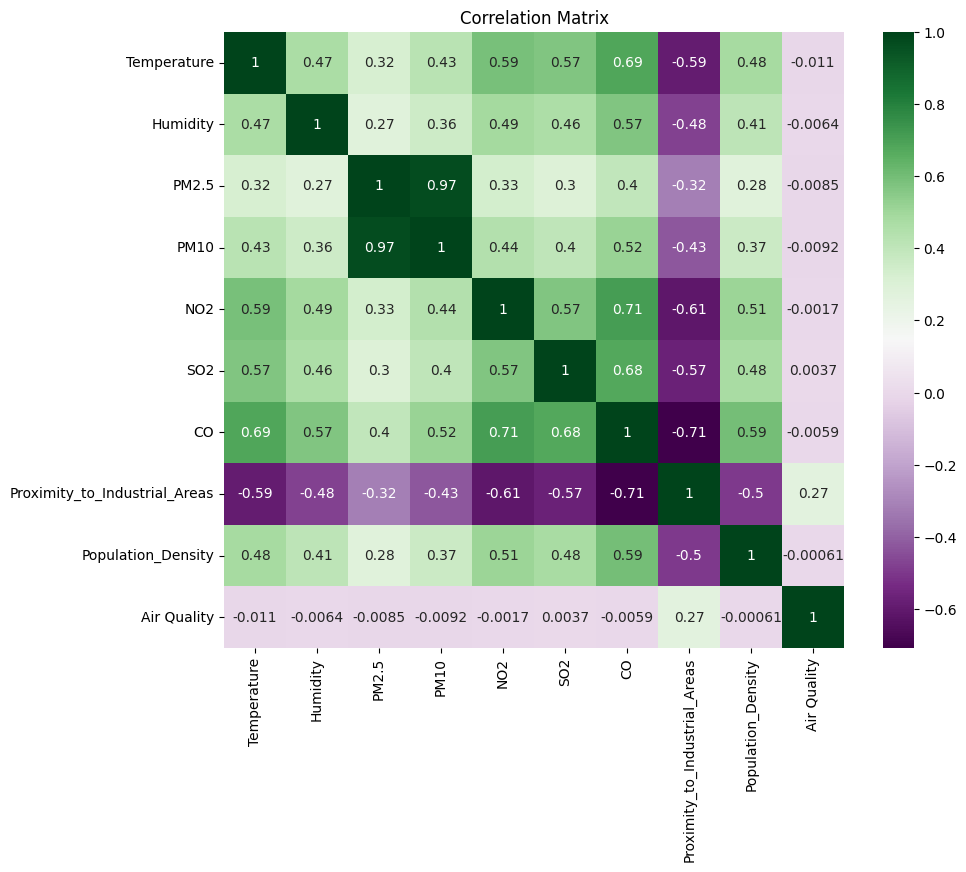

In [168]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='PRGn')
plt.title('Correlation Matrix')
plt.show()

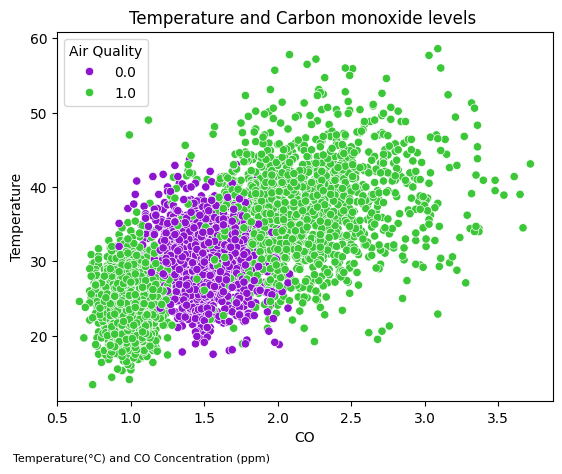

In [176]:
#Scatter plot
sns.scatterplot(x='CO', y='Temperature', hue='Air Quality', data=df, palette={0.0: '#8c15cd', 1.0: '#3bc738'})


plt.title('Temperature and Carbon monoxide levels ')
plt.text(0.2, 3, 'Temperature(°C) and CO Concentration (ppm)', fontsize=8)
plt.show()

The plot shows that as CO levels go up, temperatures tend to go up too.

**Model Training**

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Features and target
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Prediction and evaluate model
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9593333333333334


In [182]:
# Predict the classes
class_predictions = clf.predict(X_test)

# Predict the class probabilities
class_probabilities = clf.predict_proba(X_test)

print('Class Predictions:', class_predictions)
print('Class Probabilities:', class_probabilities)


Class Predictions: [1. 1. 1. ... 0. 1. 1.]
Class Probabilities: [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


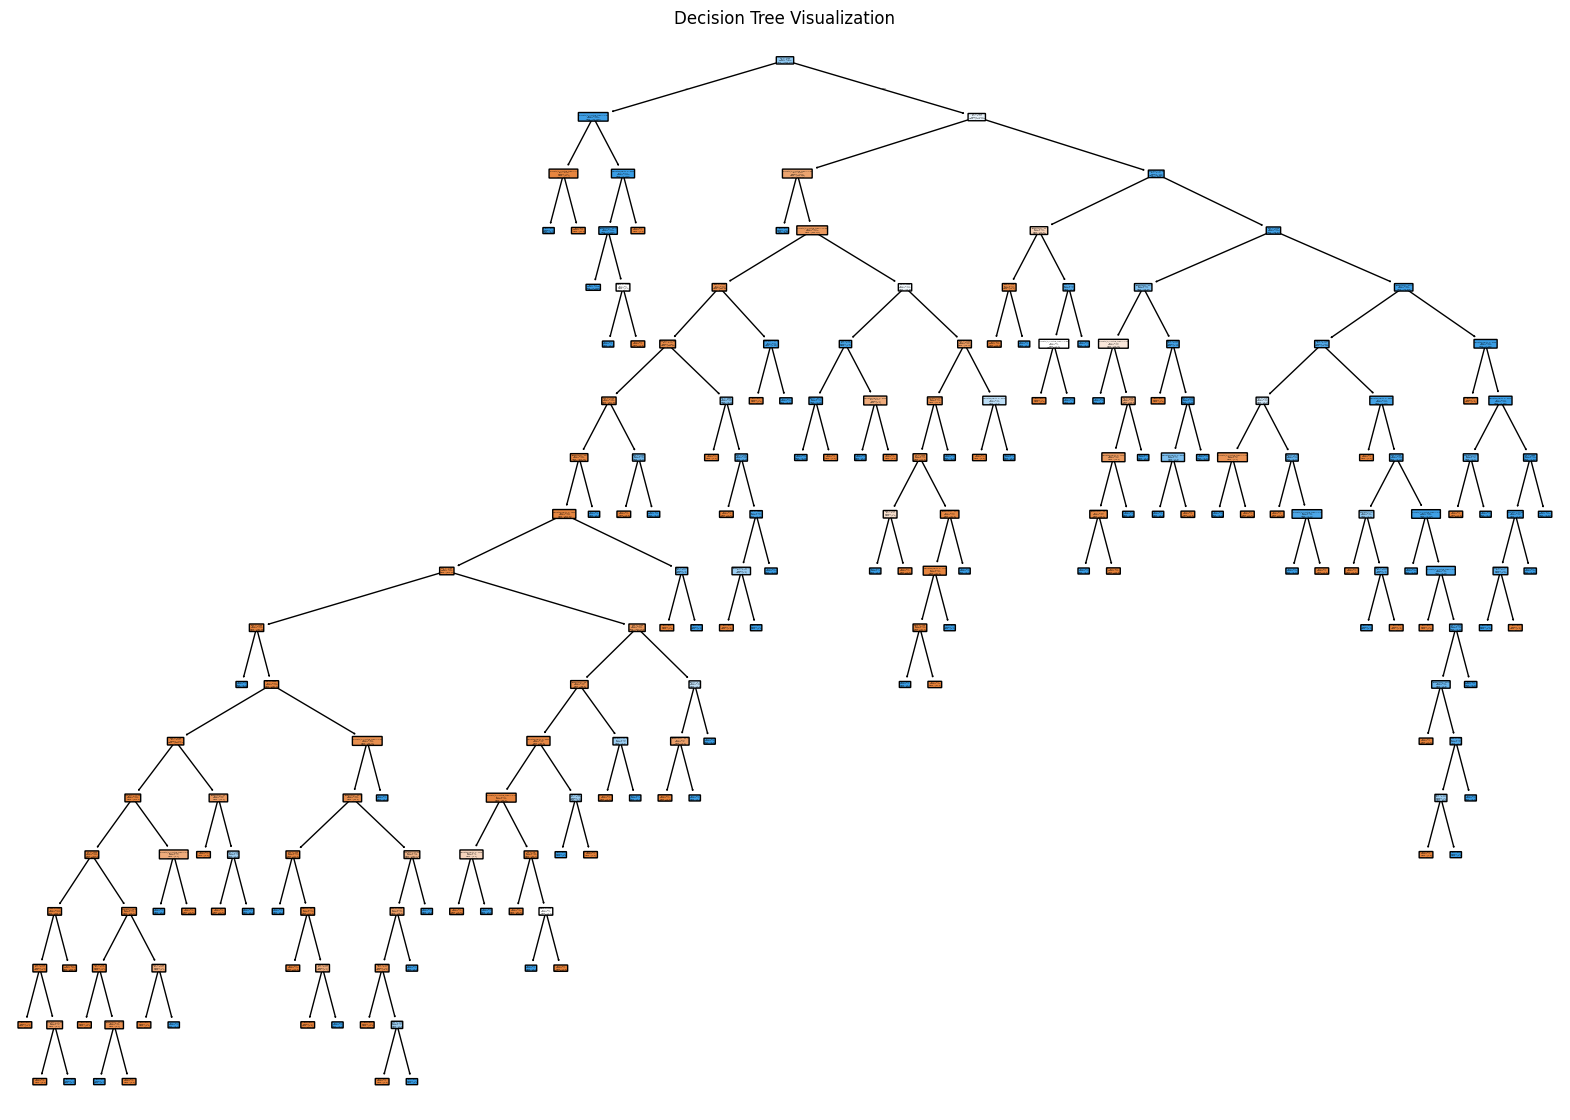

In [183]:
# Decision tree
plt.figure(figsize=(20, 14))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Poor', 'Hazardous'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


**Interpret the Results:**
The model's accuracy is 95.93%, which means that it correctly predicted the air quality class (Good or Moderate, etc.) for 95.93% of the test data.
It is confident in its predictions, with class probabilities showing clear distinctions between the predicted classes